The code performs initial data exploration by loading a Parquet file into a DataFrame, displaying the first few rows, checking general information about the dataset (such as data types and non-null counts), and identifying missing values. This helps understand the dataset's structure and potential issues like missing data. The `info()` method reveals the shape and data types, while `isnull().sum()` checks for missing values, ensuring the dataset is clean before proceeding with further analysis or modeling.

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_parquet(r"c:\Users\saall\Desktop\Arabic Sentiment Analysis for Hotel Reviews Multi-Class Prediction Model\data\train-00000-of-00001.parquet", engine="pyarrow")

# Display the first few rows
print(df.head())

# Check general info about the dataset
print(df.info())

# Check for any missing values
print(df.isnull().sum())


                                                text  label
0                  “ممتاز”. النظافة والطاقم متعاون.       1
1  استثنائي. سهولة إنهاء المعاملة في الاستقبال. ل...      4
2  استثنائي. انصح بأختيار الاسويت و بالاخص غرفه ر...      4
3  “استغرب تقييم الفندق كخمس نجوم”. لا شي. يستحق ...      0
4  جيد. المكان جميل وهاديء. كل شي جيد ونظيف بس كا...      3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105698 entries, 0 to 105697
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    105698 non-null  object
 1   label   105698 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ MB
None
text     0
label    0
dtype: int64


This code provides a summary of the dataset's numerical columns using `describe()`, which includes counts, mean, standard deviation, min, max, and quartiles. This helps in understanding the distribution of data. It then prints the count of unique values in the 'label' column using `value_counts()`, which reveals the distribution of labels in the dataset. This is useful for checking if the classes are balanced or imbalanced, which could impact model performance.

In [2]:
# Descriptive statistics (this will include counts, mean, std, etc.)
print(df.describe())

# Check unique labels in the 'label' column
print(df['label'].value_counts())


               label
count  105698.000000
mean        2.113692
std         1.464436
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         4.000000
label
1    38467
3    26450
4    26399
0    14382
Name: count, dtype: int64


This code visualizes the distribution of sentiment labels in the dataset using a bar plot. It uses `seaborn.countplot()` to display the count of each sentiment label, with the x-axis representing the sentiment labels and the y-axis representing the count of reviews for each label. The plot is displayed with the `viridis` color palette and is titled "Distribution of Sentiment Labels." This helps in identifying any class imbalances that could affect model training.

C:\Users\saall\AppData\Local\Temp\ipykernel_31168\3954993304.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='label', palette='viridis')


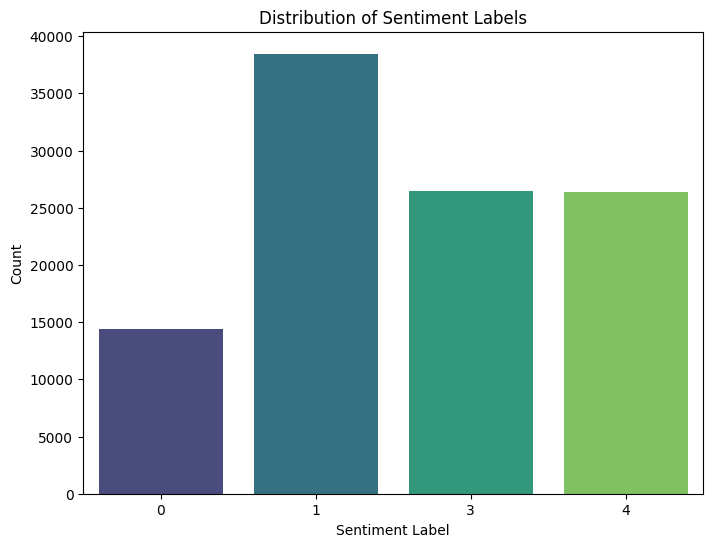

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the label distribution
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='label', palette='viridis')
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.show()


This code adds a new column to the dataset, `text_length`, which contains the length (in characters) of each review. It then visualizes the distribution of text lengths using a histogram with a kernel density estimate (KDE) curve. The `sns.histplot()` function plots the frequency of text lengths, with the x-axis representing the text length and the y-axis representing the frequency of each length. The plot helps in understanding the range and distribution of review lengths, which could be useful for setting model input size limits.

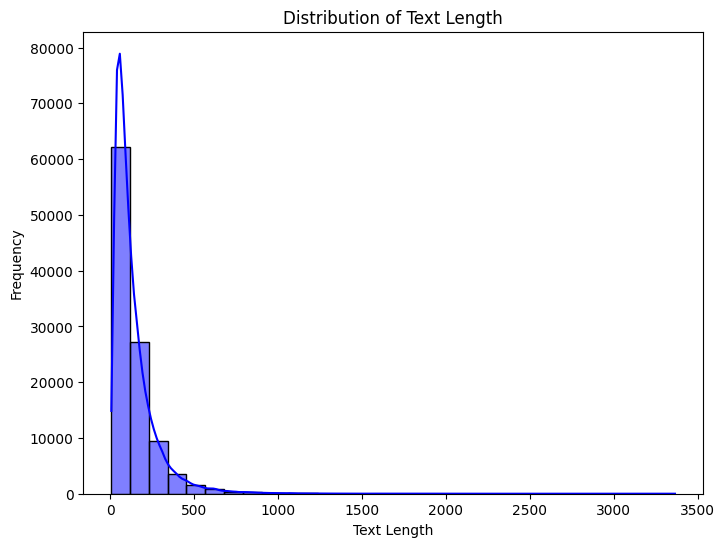

In [ ]:
# Add a new column for the length of each text
df['text_length'] = df['text'].apply(len)

# Visualize the distribution of text length
plt.figure(figsize=(8,6))
sns.histplot(df['text_length'], kde=True, color='blue', bins=30)
plt.title('Distribution of Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

This code generates a word cloud from Arabic text data in your dataset. Here's a summary of the key steps:

1. **Clean the Text**: It drops rows with missing values in the 'text' column and ensures all text data is in string format.
2. **Text Preparation**: The Arabic text from the 'text' column is concatenated into a single string.
3. **Reshaping for Display**: Since Arabic text needs to be reshaped for proper rendering, the `arabic_reshaper` and `get_display` functions are used to ensure the text displays correctly.
4. **Word Cloud Generation**: A word cloud is created using the `WordCloud` class, specifying a custom Arabic font (`Amiri-Regular.ttf`) and visual parameters like size and background color.
5. **Visualization**: The word cloud is then displayed using `matplotlib`.

The result is a visually appealing representation of the most frequent words in your dataset, where the size of each word indicates its frequency.

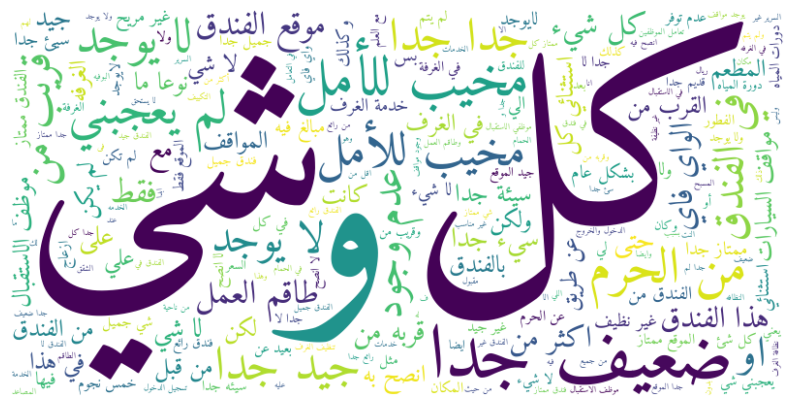

In [19]:
import arabic_reshaper
from bidi.algorithm import get_display
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Ensure that the text data is clean
df = df.dropna(subset=['text'])
df['text'] = df['text'].astype(str)

# Concatenate all Arabic text into a single string
all_arabic_text = ' '.join(df['text'].values)

# Reshape the Arabic text for correct display
reshaped_text = arabic_reshaper.reshape(all_arabic_text)
reshaped_text = get_display(reshaped_text)

# Create and generate a word cloud
font_path = r"C:\Users\saall\Desktop\Arabic Sentiment Analysis for Hotel Reviews Multi-Class Prediction Model\fonts\Amiri-Regular.ttf"
wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color='white').generate(reshaped_text)

# Display the word cloud
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


This code checks for and visualizes any imbalance in the distribution of sentiment labels in your dataset:

1. **Counting Sentiment Labels**: The frequency of each label in the `label` column is calculated using `value_counts()` and printed for inspection.
2. **Visualizing Distribution**: A bar plot is generated using `seaborn` to provide a clear visual representation of the distribution of sentiment labels. 
   - The labels are placed on the x-axis.
   - Their respective counts are plotted on the y-axis.
3. **Insights**: By examining the plot, you can identify if certain sentiment labels (e.g., positive, negative) are underrepresented, which may affect model performance due to class imbalance.

label
1    38467
3    26450
4    26399
0    14382
Name: count, dtype: int64


C:\Users\saall\AppData\Local\Temp\ipykernel_31168\4148558097.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='Set2')


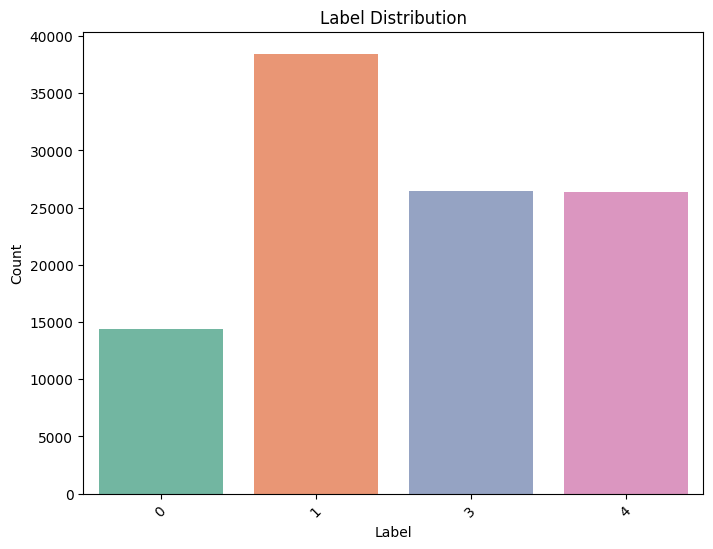

In [11]:
# Check if any sentiment label is underrepresented
sentiment_counts = df['label'].value_counts()

# Display the distribution
print(sentiment_counts)

# Visualize it
plt.figure(figsize=(8,6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='Set2')
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


This code snippet is used to inspect random samples of text data corresponding to each sentiment label:

1. **Iterating Over Unique Labels**: The loop iterates through all unique sentiment labels present in the `label` column of the dataset.
   
2. **Sampling Data**: For each label, it selects three random samples of text from the rows that belong to that specific label using the `.sample(3)` method.

3. **Displaying Text**: The selected samples are displayed alongside their label for easy inspection.

### Purpose
This approach helps in:
- Understanding the nature of the text data for each sentiment category.
- Validating that the labeling aligns with the sentiment the text conveys.
- Spot-checking for any anomalies or inconsistencies in the dataset.



In [12]:
# Inspect random samples of each label
for label in df['label'].unique():
    print(f"--- Label {label} ---")
    sample = df[df['label'] == label].sample(3)
    print(sample[['text']])
    print("\n")


--- Label 1 ---
                                                    text
33467  “الخدمة ضعيفة جدا جدا والصور فالموقع عكس الواق...
79279  “دبي مدينة التسوق والاحلام”. قرب الفندق من الس...
35309  ضعيف. نضام الغرف مع الستاير غير مريح النور كلم...


--- Label 4 ---
                                                    text
63208              استثنائي. كل شيء رائع. مواقف السيارات
20974  “رائع”. كل شي كان رائع واعجبني المكان والراحه....
82817    ممتاز. القيمه مقابل المالالنظافه قربه من مسجد. 


--- Label 0 ---
                                                    text
13807  “غير جيدة”. لاشي. الخدمات والموظفين غير مؤهلين...
63926  “تجربه لن تتكرر”. لم يعجبني شي. المواقف سيئه و...
59877  “لا انصح احد في السكن بهذا الفندق”. اسوأ خدمة ...


--- Label 3 ---
                                                    text
51259  “شقق جيدة”. النظافةالسريرجاكوزي. قوة دفع الماء...
74350  جيد. كل شب جبد ومرتب السلبية الوحيدة هي عدم تن...
84730  جيد. تكييف الشقق ضعيف ورائحه فرش الممرات بين  ...




This code checks for duplicate text entries in the dataset:

1. **Identifying Duplicates**:  
   - The `duplicated` method is used to find rows where the `text` column contains duplicate values.  
   - `keep=False` ensures that all duplicates are flagged, not just the first or last instance.

2. **Filtering Duplicate Rows**:  
   - Rows identified as duplicates are filtered and stored in the `duplicates` DataFrame.

3. **Counting Duplicates**:  
   - The `len` function is used to count the total number of duplicate rows.

### Purpose
- **Quality Check**: Identifies duplicate entries that may skew analysis or model training.
- **Dataset Cleaning**: Helps in deciding whether to remove duplicates for a cleaner dataset.

In [13]:
# Check for duplicate text entries
duplicates = df[df.duplicated(subset='text', keep=False)]
print(f"Number of duplicate entries: {len(duplicates)}")


Number of duplicate entries: 2232
